The goal of training neural networks is to find these perfect representation of data, which we get by "learning" the right weights

# MNIST


Fashion-MNIST is a dataset of Zalando's article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples.  
    
Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
<br>
<ul>
    <li>Each row is a separate image  </li>
    <li>Column label is the target class</li>
    <li>Remaining columns are pixel numbers (784 = 28*28)</li>
    <li>Each value is the darkness of the pixel (1 to 255)</li>
</ul>


Each training and test example is assigned to one of the following labels:

<ul>
    <li>0 T-shirt/top</li>
    <li>1 Trouser</li>
    <li>2 Pullover  
    <li>3 Dress  
    <li>4 Coat  
    <li>5 Sandal  
    <li>6 Shirt  
    <li>7 Sneaker  
    <li>8 Bag  
    <li>9 Ankle boot </li>
</ul>
</font>   

In [104]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import backend as K
import keras

In [105]:

# Accessing My Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Load the dataset

In [106]:
#Read Train dataset
path_tr = "drive/My Drive/MNISTdata/FashionMNISTDataset/fashion-mnist_train.csv"

train = pd.read_csv(path_tr)

In [107]:
#Read Test dataset
path_ts = "drive/My Drive/MNISTdata/FashionMNISTDataset/fashion-mnist_test.csv"

test = pd.read_csv(path_ts)

In [108]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


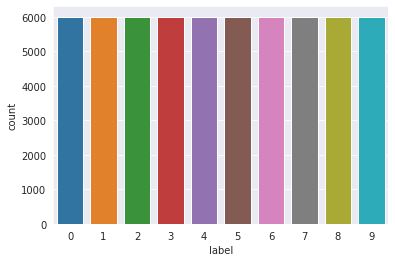

In [109]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

sns.countplot(x="label", data=train),
            
plt.show()

In [110]:
train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [111]:
test.label.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [112]:
print(train.isnull().sum())


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [113]:
print(test.isnull().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


### Seperate out train and test

In [114]:
X_train = np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,0])

X_test = np.array(test.iloc[:,1:])
y_test = np.array(test.iloc[:,0])

In [115]:
print('x_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape:  {}'.format(X_test.shape))
print('y_test shape:  {}'.format(y_test.shape))

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape:  (10000, 784)
y_test shape:  (10000,)


In [116]:
#normalizing the range to 0 - 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### View some of the images from the datset

[49068 11749  8331  2073 43377 41486 29752 46712 10472  3405]


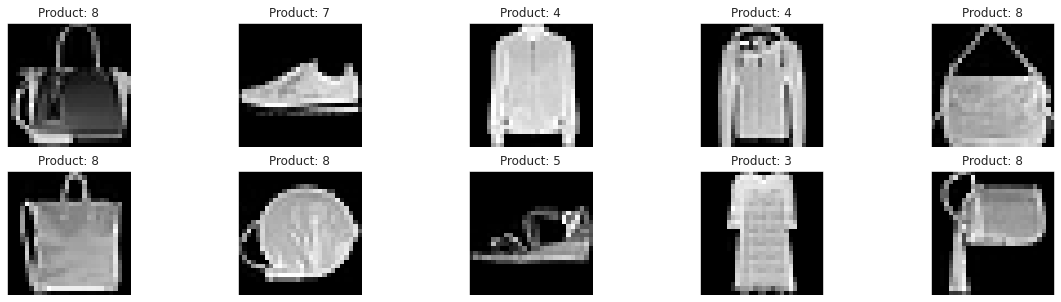

In [117]:
import matplotlib.pyplot as plt    # For plotting 
%matplotlib inline                 

s = np.random.choice(range(X_train.shape[0]), size=10, replace=False)  # Randomly select few samples

print(s)
plt.figure(figsize=(20,5))
for i,j in enumerate(s):   
    plt.subplot(2,5,i+1)                                # Subplot flag
    plt.imshow(np.array(X_train[j]).reshape(28,28))     # Plot the image
    plt.title('Product: '+str(y_train[j]))              # Target of the image
    plt.xticks([])                                      # No X-Axis ticks
    plt.yticks([])                                      # No Y-Axis ticks
    plt.gray()                                          # For gray scale images 

###Converts the class lebels to one-hot vectors.

In [118]:
from keras.utils import to_categorical

print(y_train)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[2 9 6 ... 8 8 7]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## Model Building

In [119]:
from keras.models import Sequential 
from keras.layers import Dense

###Keras
Keras is an easy to use python library for neural network that provides API running on top of Tenserflow, CNTK or Theano.
Layers are the fundamental building block of neural networks. Keras has various layer objects like Dense, Conv1D, Conv2D etc., for the jobs a network has to perform. These layer are added to the Keras Sequential list object.

`Sequential` is a container which stores the layers in order.

`Dense` is a fully connected feedforward layer.

In [120]:
model = Sequential() # This initializes a sequential model to which we can keep adding layers.
# input layer L0, Features = 784
# Add a dense layer 
model.add(Dense(200, 
                kernel_initializer='uniform', 
                input_dim = 784, 
                activation='relu')
         ) 
# L1
model.add(Dense(100, 
                kernel_initializer='uniform', 
                activation='relu'))

#L2
model.add(Dense(50, 
                kernel_initializer='uniform', 
                activation='relu'))

# Add output layer
model.add(Dense(10, 
                kernel_initializer='uniform', 
                activation='softmax')
         ) 

In [121]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


####Trainable params: 182,660

### Setting learning and momentum

The loss score is feedback signal that says how far is the output of your network compared to the ground truth.  

    
An optimizer is an algorithm that uses this feedback signal, to actually update the weights so that the output from the network gets closer to the ground truth. The first optimizer that we use is Adam.

In [122]:
from keras.optimizers import Adam

model.compile(loss = 'categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer = Adam(lr = 0.001),      # Adam is the state of the art Gradient Descent variation. 
              metrics = ['accuracy']) 

### Training the MLP model
<br>
* An __Epoch__ is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.  
<br>
* Since most of the times an epoch is too large to fit in memory, we divide the data into batches and compute the gradient on batches for each forward and backward pass  
<br>
* __Batch size__ is the number of samples that are going to be propagated through the network.

In [123]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 20, 
                    batch_size = 64, 
                    validation_split = 0.5
                   ) 

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.1285 - accuracy: 0.5677 - val_loss: 0.5771 - val_accuracy: 0.7888
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5362 - accuracy: 0.8108 - val_loss: 0.4693 - val_accuracy: 0.8316
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4432 - accuracy: 0.8416 - val_loss: 0.4359 - val_accuracy: 0.8438
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4030 - accuracy: 0.8529 - val_loss: 0.4081 - val_accuracy: 0.8519
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3648 - accuracy: 0.8709 - val_loss: 0.4198 - val_accuracy: 0.8491
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3453 - accuracy: 0.8766 - val_loss: 0.3832 - val_accuracy: 0.8629
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3243 - accuracy: 0.8817 - val_loss: 0.3728 - val_accuracy: 0.8670
Epoch 

#### Use the history object


In [124]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Extract out the required column data to see output and plot

In [125]:
train_loss = history.history['loss']
print("train_loss : ", train_loss[:3])

train_acc = history.history['accuracy']
print("train_acc : ", train_acc[:3])

val_loss = history.history['val_loss']
print("val_loss : ", val_loss[:3])

val_acc = history.history['val_accuracy']
print("val_acc : ", val_acc[:3])

train_loss :  [0.7927231192588806, 0.5099954009056091, 0.4377240538597107]
train_acc :  [0.7007666826248169, 0.8185999989509583, 0.8422999978065491]
val_loss :  [0.5771291255950928, 0.4692544937133789, 0.43586185574531555]
val_acc :  [0.7887666821479797, 0.83160001039505, 0.8438000082969666]


#### Visualise performance with every epoch

In [126]:
import seaborn as sns

sns.set_style('darkgrid')

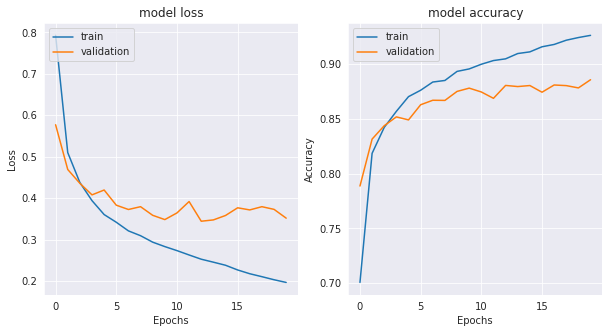

In [127]:
from matplotlib import pyplot as plt

%matplotlib inline 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')

plt.legend(['train', 'validation'], loc='upper left')


plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### Predictions

In [128]:
test_predpn = model.predict_classes(X_test)
#print(test_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [129]:
test_predp = model.predict(X_test)
#print(test_pred)

In [130]:
y_pred=np.argmax(test_predp,axis=1)
print(y_pred)

[0 1 2 ... 8 8 1]


### Print Result

####Evaluate the score on test

In [131]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8836


In [132]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.35672327876091003, 0.8835999965667725]


In [133]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([0, 1, 2, ..., 8, 8, 1])

###Confusion Matrix

In [134]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_pred, rounded_labels)
print(confusion_matrix1)

[[884   3  30  21   1   0 178   0   9   1]
 [  7 984   2  20   2   0   7   1   0   0]
 [  9   0 785   7  85   0  63   0   5   0]
 [ 17  11  21 915  37   0  27   0   4   0]
 [  1   1  79  20 813   0  50   0   1   0]
 [  2   1   0   0   0 931   0  22   2   8]
 [ 70   0  81  13  61   1 668   0  12   0]
 [  0   0   0   0   0  40   0 930   2  28]
 [ 10   0   2   3   1   2   7   0 963   0]
 [  0   0   0   1   0  26   0  47   2 963]]


### F1 Score

F1 = 2 * (precision * recall) / (precision + recall)


In [135]:
from sklearn.metrics import f1_score
f1_score(rounded_labels, test_predpn, average=None)


array([0.83121768, 0.97281265, 0.80348004, 0.90059055, 0.82748092,
       0.94710071, 0.70094439, 0.93      , 0.96881288, 0.94458068])

### Classification Report

In [136]:
from sklearn.metrics import classification_report

print(classification_report(rounded_labels, test_predpn))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.96      0.98      0.97      1000
           2       0.82      0.79      0.80      1000
           3       0.89      0.92      0.90      1000
           4       0.84      0.81      0.83      1000
           5       0.96      0.93      0.95      1000
           6       0.74      0.67      0.70      1000
           7       0.93      0.93      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

